In [3]:
install.packages("tidyverse")
install.packages("tidymodels")
install.packages("rlang")


The downloaded binary packages are in
	/var/folders/wy/f2g87lw121qf8pt2k7_d4ysr0000gn/T//RtmpnZmTn6/downloaded_packages

The downloaded binary packages are in
	/var/folders/wy/f2g87lw121qf8pt2k7_d4ysr0000gn/T//RtmpnZmTn6/downloaded_packages

The downloaded binary packages are in
	/var/folders/wy/f2g87lw121qf8pt2k7_d4ysr0000gn/T//RtmpnZmTn6/downloaded_packages


In [4]:
library(tidyverse)
library(tidymodels)
library(stringr)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.3.0 ──

✔ broom        1.0.7     ✔ rsample      1.2.1
✔ dials        1.4.0     ✔ tune         1.3.0
✔ infer        1.0.7     ✔ workflows    1.2.0
✔ modeldata    1.4.0     ✔ workflowsets 1.1.0
✔ parsnip      1.3.0     ✔ yardstick    1.3.2
✔ recipes      1.1.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

In [8]:
# Dataset URL
dataset_url <- "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-RP0321EN-SkillsNetwork/labs/datasets/seoul_bike_sharing_converted_normalized.csv"
bike_sharing_df <- read_csv(dataset_url)

Rows: 8465 Columns: 41
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): DATE, FUNCTIONING_DAY
dbl (39): RENTED_BIKE_COUNT, TEMPERATURE, HUMIDITY, WIND_SPEED, VISIBILITY, ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [9]:
bike_sharing_df <- bike_sharing_df %>% 
                   select(-DATE, -FUNCTIONING_DAY)

In [10]:
lm_spec <- linear_reg() %>%
  set_engine("lm") %>% 
  set_mode("regression")

In [11]:
set.seed(1234)
data_split <- initial_split(bike_sharing_df, prop = 4/5)
train_data <- training(data_split)
test_data <- testing(data_split)

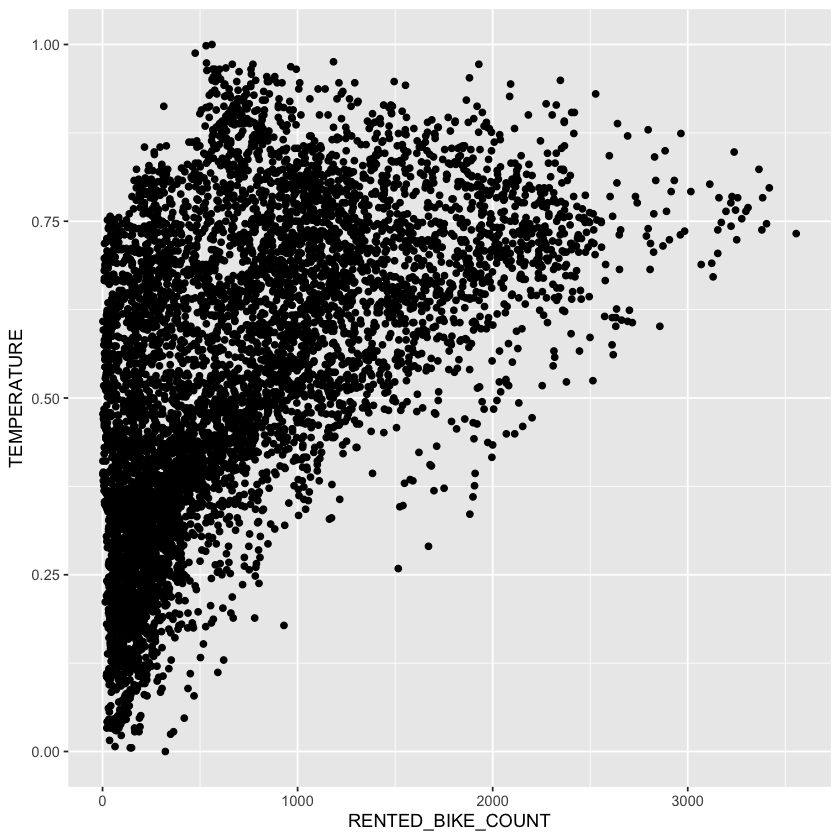

In [12]:
ggplot(data = train_data, aes(RENTED_BIKE_COUNT, TEMPERATURE)) + 
    geom_point() 

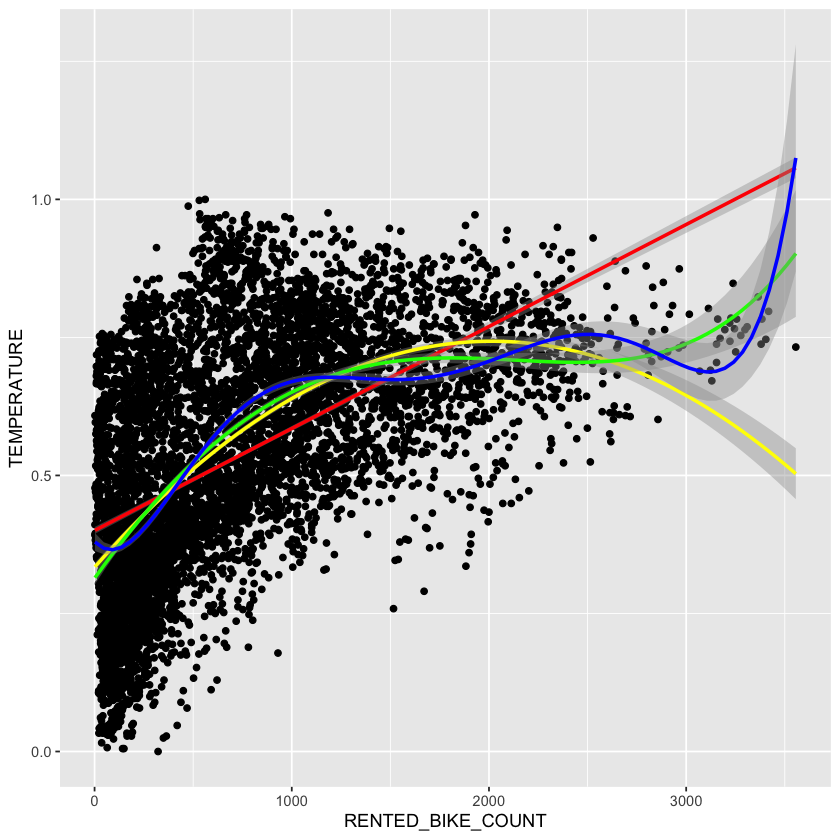

In [13]:
# Plot the higher order polynomial fits
ggplot(data=train_data, aes(RENTED_BIKE_COUNT, TEMPERATURE)) + 
    geom_point() + 
    geom_smooth(method = "lm", formula = y ~ x, color="red") + 
    geom_smooth(method = "lm", formula = y ~ poly(x, 2), color="yellow") + 
    geom_smooth(method = "lm", formula = y ~ poly(x, 4), color="green") + 
    geom_smooth(method = "lm", formula = y ~ poly(x, 6), color="blue")

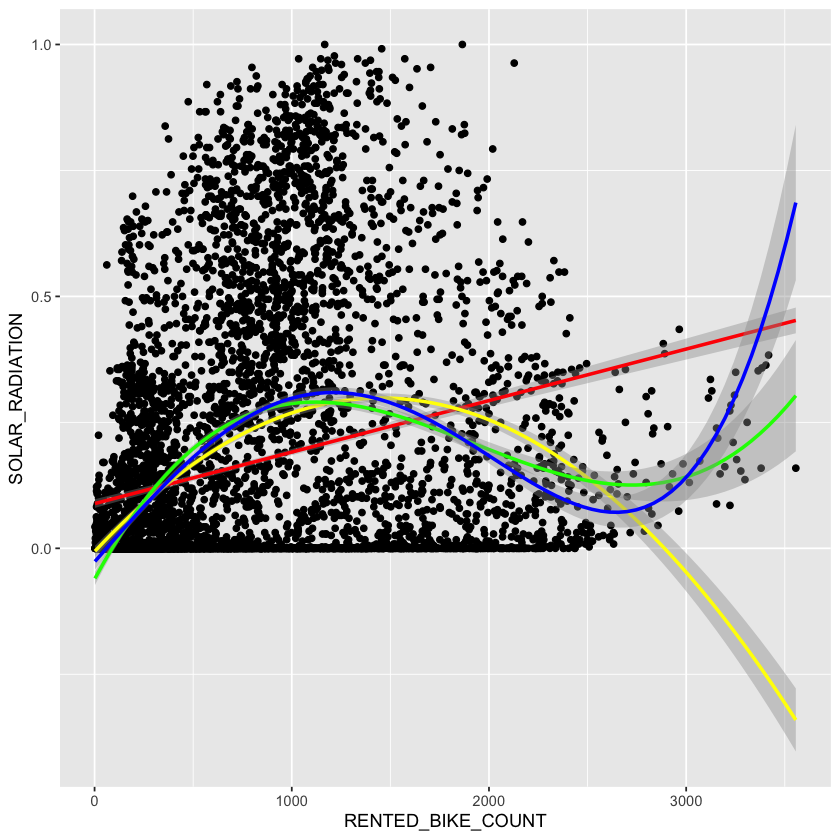

In [30]:
ggplot(data = train_data, aes(x = RENTED_BIKE_COUNT, y = SOLAR_RADIATION)) + 
  geom_point() + 
  geom_smooth(method = "lm", formula = y ~ x, color = "red") + 
  geom_smooth(method = "lm", formula = y ~ poly(x, 2), color = "yellow") + 
  geom_smooth(method = "lm", formula = y ~ poly(x, 3), color = "green") + 
  geom_smooth(method = "lm", formula = y ~ poly(x, 4), color = "blue")


In [40]:
# Fit a linear regression model with higher order polynomial terms on important variables
lm_poly <- lm_spec %>%
  fit(RENTED_BIKE_COUNT ~ poly(TEMPERATURE, 4) + poly(HUMIDITY, 2) + 
                     + poly(SOLAR_RADIATION, 3) + poly (DEW_POINT_TEMPERATURE, 2) + WIND_SPEED  + VISIBILITY + RAINFALL + SNOWFALL,
      data = train_data)

# Print summary of the fitted model
summary(lm_poly$fit)



Call:
stats::lm(formula = RENTED_BIKE_COUNT ~ poly(TEMPERATURE, 4) + 
    poly(HUMIDITY, 2) + +poly(SOLAR_RADIATION, 3) + poly(DEW_POINT_TEMPERATURE, 
    2) + WIND_SPEED + VISIBILITY + RAINFALL + SNOWFALL, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-1457.71  -242.22   -50.27   192.00  1917.26 

Coefficients:
                                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)                        642.759     19.283  33.333  < 2e-16 ***
poly(TEMPERATURE, 4)1            74399.191   4334.941  17.163  < 2e-16 ***
poly(TEMPERATURE, 4)2             9131.313    848.674  10.760  < 2e-16 ***
poly(TEMPERATURE, 4)3           -12839.581    459.188 -27.962  < 2e-16 ***
poly(TEMPERATURE, 4)4            -4756.647    444.080 -10.711  < 2e-16 ***
poly(HUMIDITY, 2)1               -1029.305   2032.218  -0.506    0.613    
poly(HUMIDITY, 2)2               -5952.297    578.304 -10.293  < 2e-16 ***
poly(SOLAR_RADIATION, 3)1       -10484.825    621.690 -16.86

In [41]:
test_results_poly <- test_data %>%
  mutate(prediction = predict(lm_poly, new_data = test_data) %>% pull(.pred))

In [43]:
head(test_results_poly)

RENTED_BIKE_COUNT,TEMPERATURE,HUMIDITY,WIND_SPEED,VISIBILITY,DEW_POINT_TEMPERATURE,SOLAR_RADIATION,RAINFALL,SNOWFALL,0,⋯,7,8,9,AUTUMN,SPRING,SUMMER,WINTER,HOLIDAY,NO_HOLIDAY,prediction
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
100,0.1993007,0.3775510,0.2027027,1.0000000,0.2058824,0.0000000,0,0,0,⋯,0,0,0,0,0,0,1,0,1,138.095325
181,0.1958042,0.3571429,0.1756757,1.0000000,0.1920415,0.0000000,0,0,0,⋯,0,0,0,0,0,0,1,0,1,103.982905
360,0.3024476,0.2142857,0.1756757,0.9675621,0.1799308,0.2670455,0,0,0,⋯,0,0,0,0,0,0,1,0,1,262.474570
405,0.2972028,0.8265306,0.1081081,0.8413583,0.4671280,0.0000000,0,0,0,⋯,0,0,0,0,0,0,1,0,1,67.866805
328,0.2797203,0.8877551,0.1486486,0.4901166,0.4671280,0.0000000,0,0,1,⋯,0,0,0,0,0,0,1,0,1,-5.983925
479,0.3863636,0.4183673,0.1756757,0.8307146,0.3944637,0.3096591,0,0,0,⋯,0,0,0,0,0,0,1,0,1,612.157366


In [44]:
test_results_poly <- test_results_poly %>%
  mutate(prediction = if_else(prediction < 0, 0, prediction))


In [45]:
head(test_results_poly)

RENTED_BIKE_COUNT,TEMPERATURE,HUMIDITY,WIND_SPEED,VISIBILITY,DEW_POINT_TEMPERATURE,SOLAR_RADIATION,RAINFALL,SNOWFALL,0,⋯,7,8,9,AUTUMN,SPRING,SUMMER,WINTER,HOLIDAY,NO_HOLIDAY,prediction
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
100,0.1993007,0.3775510,0.2027027,1.0000000,0.2058824,0.0000000,0,0,0,⋯,0,0,0,0,0,0,1,0,1,138.09533
181,0.1958042,0.3571429,0.1756757,1.0000000,0.1920415,0.0000000,0,0,0,⋯,0,0,0,0,0,0,1,0,1,103.98291
360,0.3024476,0.2142857,0.1756757,0.9675621,0.1799308,0.2670455,0,0,0,⋯,0,0,0,0,0,0,1,0,1,262.47457
405,0.2972028,0.8265306,0.1081081,0.8413583,0.4671280,0.0000000,0,0,0,⋯,0,0,0,0,0,0,1,0,1,67.86681
328,0.2797203,0.8877551,0.1486486,0.4901166,0.4671280,0.0000000,0,0,1,⋯,0,0,0,0,0,0,1,0,1,0.00000
479,0.3863636,0.4183673,0.1756757,0.8307146,0.3944637,0.3096591,0,0,0,⋯,0,0,0,0,0,0,1,0,1,612.15737


In [46]:
rsq_poly <- rsq(test_results_poly, truth = RENTED_BIKE_COUNT, estimate = prediction)
rmse_poly <- rmse(test_results_poly, truth = RENTED_BIKE_COUNT, estimate = prediction)

print(rsq_poly)
print(rmse_poly)


# A tibble: 1 × 3
  .metric .estimator .estimate
  <chr>   <chr>          <dbl>
1 rsq     standard       0.562
# A tibble: 1 × 3
  .metric .estimator .estimate
  <chr>   <chr>          <dbl>
1 rmse    standard        419.


In [47]:
install.packages("glmnet")


The downloaded binary packages are in
	/var/folders/wy/f2g87lw121qf8pt2k7_d4ysr0000gn/T//RtmpnZmTn6/downloaded_packages


In [48]:
library(glmnet)

Loading required package: Matrix


Attaching package: ‘Matrix’


The following objects are masked from ‘package:tidyr’:

    expand, pack, unpack


Loaded glmnet 4.1-9



In [49]:
# Define glmnet model specification with tuning parameters penalty and mixture
glmnet_spec <- linear_reg(
  penalty = 0.01,    # example value, can tune later
  mixture = 0.5      # 0 = Ridge, 1 = Lasso, 0.5 = Elastic Net
) %>%
  set_engine("glmnet") %>%
  set_mode("regression")

# Fit glmnet model using formula with polynomial terms
lm_glmnet <- glmnet_spec %>%
  fit(RENTED_BIKE_COUNT ~ poly(TEMPERATURE, 4) + poly(HUMIDITY, 2) + 
                     poly(SOLAR_RADIATION, 3) + poly(DEW_POINT_TEMPERATURE, 2) + 
                     WIND_SPEED + VISIBILITY + RAINFALL + SNOWFALL,
      data = train_data)


In [59]:
# To see coefficients at a specific lambda:
coef(lm_glmnet$fit, s = 0.01)

16 x 1 sparse Matrix of class "dgCMatrix"
                                          s0
(Intercept)                        641.95577
poly(TEMPERATURE, 4)1            70661.77068
poly(TEMPERATURE, 4)2             9114.12229
poly(TEMPERATURE, 4)3           -12798.90676
poly(TEMPERATURE, 4)4            -4749.38026
poly(HUMIDITY, 2)1               -2666.64637
poly(HUMIDITY, 2)2               -5753.67708
poly(SOLAR_RADIATION, 3)1       -10352.66550
poly(SOLAR_RADIATION, 3)2        -7445.68512
poly(SOLAR_RADIATION, 3)3         5821.82177
poly(DEW_POINT_TEMPERATURE, 2)1 -39757.50684
poly(DEW_POINT_TEMPERATURE, 2)2 -18645.47616
WIND_SPEED                         378.95484
VISIBILITY                          10.54714
RAINFALL                         -1012.53701
SNOWFALL                            93.02217

In [52]:
# Predict on test data
test_results_glmnet <- test_data %>%
  mutate(prediction = predict(lm_glmnet, new_data = test_data) %>% pull(.pred))

In [53]:
# Calculate R-squared and RMSE
rsq_glmnet <- rsq(test_results_glmnet, truth = RENTED_BIKE_COUNT, estimate = prediction)
rmse_glmnet <- rmse(test_results_glmnet, truth = RENTED_BIKE_COUNT, estimate = prediction)

print(rsq_glmnet)
print(rmse_glmnet)

# A tibble: 1 × 3
  .metric .estimator .estimate
  <chr>   <chr>          <dbl>
1 rsq     standard       0.560
# A tibble: 1 × 3
  .metric .estimator .estimate
  <chr>   <chr>          <dbl>
1 rmse    standard        420.


In [83]:
#for auto tuning and grid search
# 1. Create a model spec with tuning placeholders
glmnet_spec <- linear_reg(
  penalty = tune(),
  mixture = tune()
) %>%
  set_engine("glmnet") %>%
  set_mode("regression")

# 2. Set up cross-validation folds
set.seed(123)
cv_folds <- vfold_cv(train_data, v = 5)

# 3. Define a grid of values to try
grid <- grid_regular(
  penalty(range = c(-4, 0)), # log10 scale: 1e-4 to 1
  mixture(),
  levels = 5
)

# 4. Fit models using grid search
glmnet_tune <- tune_grid(
  glmnet_spec,
  RENTED_BIKE_COUNT ~ poly(TEMPERATURE, 4) + poly(HUMIDITY, 2) + 
    poly(SOLAR_RADIATION, 3) + poly(DEW_POINT_TEMPERATURE, 2) +
    WIND_SPEED + VISIBILITY + RAINFALL + SNOWFALL,
  resamples = cv_folds,
  grid = grid,
  metrics = metric_set(rmse, rsq)
)
show_best(glmnet_tune, metric = "rmse")
#see all matrix with 
#collect_metrics(glmnet_tune)


penalty,mixture,.metric,.estimator,mean,n,std_err,.config
<dbl>,<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1e-04,0.5,rmse,standard,430.1484,5,3.077020,Preprocessor1_Model11
1e-03,0.5,rmse,standard,430.1484,5,3.077020,Preprocessor1_Model12
1e-02,0.5,rmse,standard,430.1484,5,3.077020,Preprocessor1_Model13
1e-01,0.5,rmse,standard,430.1484,5,3.077020,Preprocessor1_Model14
1e-04,1.0,rmse,standard,430.1509,5,3.079892,Preprocessor1_Model21


In [81]:
#search of best model
lm_poly <- lm_spec %>%
  fit(RENTED_BIKE_COUNT ~ poly(TEMPERATURE, 4) + poly(HUMIDITY, 2) + 
                         poly(SOLAR_RADIATION, 3) + poly(DEW_POINT_TEMPERATURE, 2) + 
                         .,
      data = train_data)
test_results_poly <- test_data %>%
  mutate(prediction = predict(lm_poly, new_data = test_data) %>% pull(.pred))
rsq_poly <- rsq(test_results_poly, truth = RENTED_BIKE_COUNT, estimate = prediction)
rmse_poly <- rmse(test_results_poly, truth = RENTED_BIKE_COUNT, estimate = prediction)
print(rsq_poly)
print(rmse_poly)

Warning message:
“There was 1 warning in `mutate()`.
ℹ In argument: `prediction = predict(lm_poly, new_data = test_data) %>%
  pull(.pred)`.
Caused by warning in `predict.lm()`:
! prediction from rank-deficient fit; consider predict(., rankdeficient="NA")”


# A tibble: 1 × 3
  .metric .estimator .estimate
  <chr>   <chr>          <dbl>
1 rsq     standard       0.747
# A tibble: 1 × 3
  .metric .estimator .estimate
  <chr>   <chr>          <dbl>
1 rmse    standard        318.


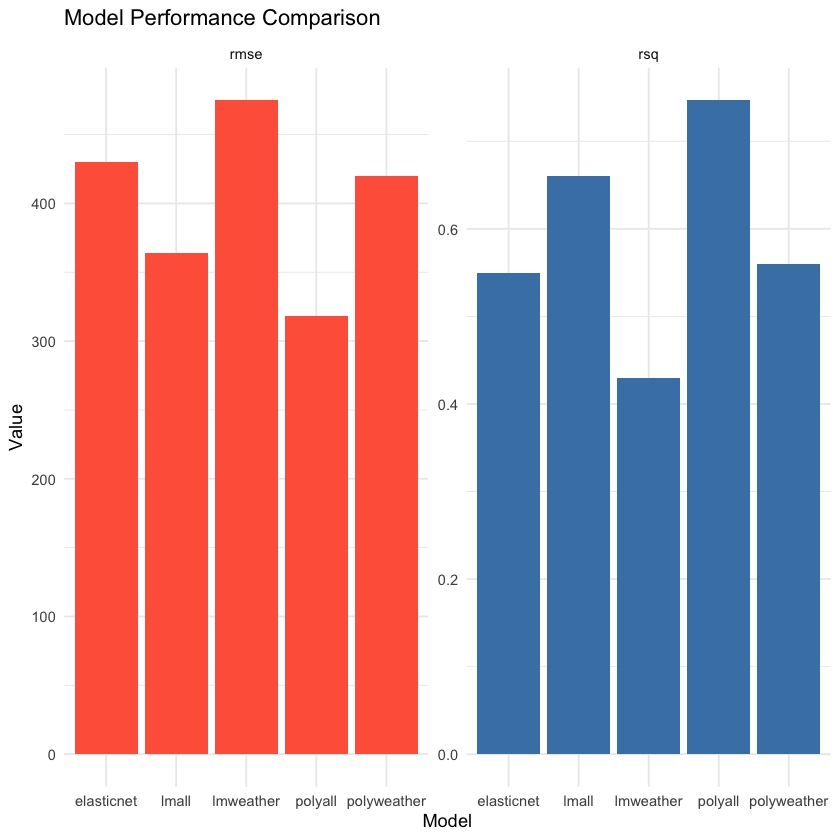

In [85]:
# visually see which model was best i.e. having low rmse and high rsq
results <- data.frame(
  model = c("polyall", "elasticnet", "polyweather", "lmall", "lmweather"),
  rmse = c(318, 430, 420, 364, 475),
  rsq = c(0.747, 0.55, 0.56, 0.66, 0.43)
)
results_long <- results %>%
  pivot_longer(cols = c(rmse, rsq), 
               names_to = "metric", 
               values_to = "value")
ggplot(results_long, aes(x = model, y = value, fill = metric)) +
  geom_bar(stat = "identity") +
  facet_wrap(~metric, scales = "free_y") +   # separate y-axis for each metric
  labs(title = "Model Performance Comparison",
       x = "Model",
       y = "Value") +
  theme_minimal() +
  scale_fill_manual(values = c("rmse" = "tomato", "rsq" = "steelblue")) +
  theme(legend.position = "none")

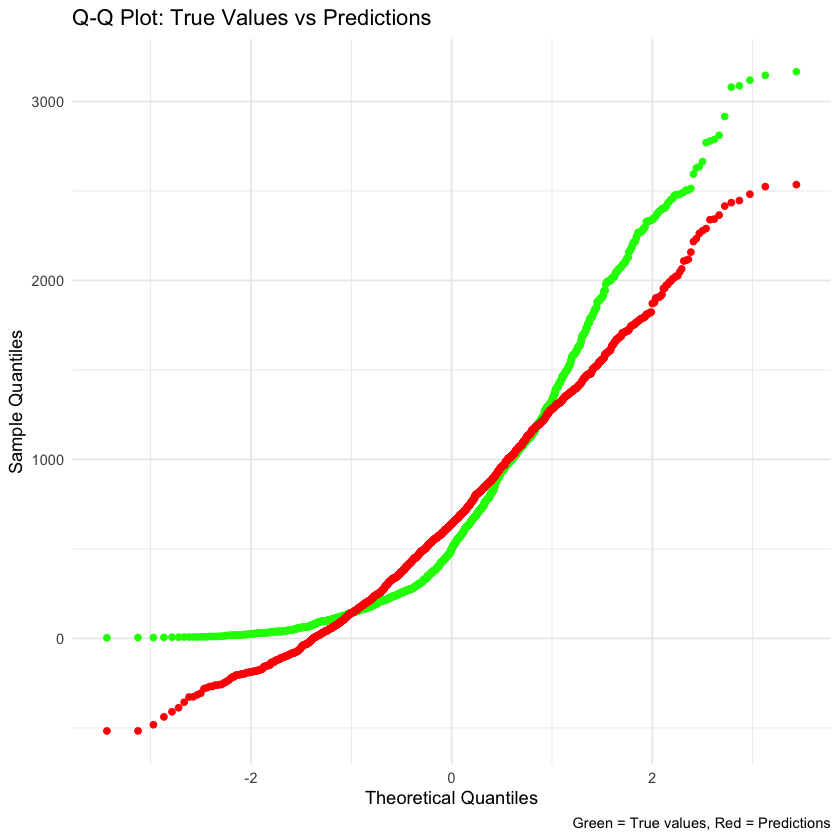

In [86]:
library(ggplot2)

ggplot() +
  stat_qq(data = test_results_poly, aes(sample = RENTED_BIKE_COUNT), color = "green") +
  stat_qq(data = test_results_poly, aes(sample = prediction), color = "red") +
  labs(title = "Q-Q Plot: True Values vs Predictions",
       x = "Theoretical Quantiles",
       y = "Sample Quantiles",
       caption = "Green = True values, Red = Predictions") +
  theme_minimal()
